Iteration 0, loss: 24.013769149780273
Iteration 20, loss: 1.2995754480361938
Iteration 40, loss: 0.7127510905265808
Iteration 60, loss: 0.5503060817718506
Iteration 80, loss: 0.4767545163631439
Iteration 100, loss: 0.4362272322177887
Iteration 120, loss: 0.4106407165527344
Iteration 140, loss: 0.3869839012622833
Iteration 160, loss: 0.36737626791000366
Iteration 180, loss: 0.3564218282699585


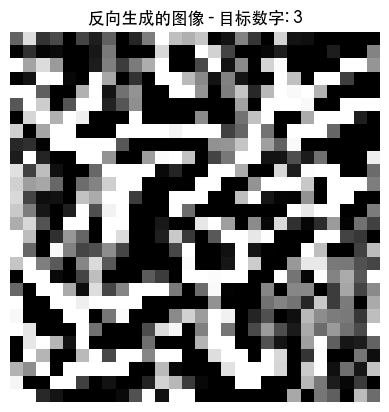

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['Songti SC']  # 使用宋体
plt.rcParams['font.sans-serif'] = ['Heiti TC']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号



# 假设已经定义好 CNN 类，并加载预训练权重
model = CNN()
model.load_state_dict(torch.load("mnist_cnn.pth", map_location=torch.device('cpu')))
model.eval()  # 设置为评估模式

# 设定目标类别，这里假设目标类别为数字 3
target_class = 3

# 构造目标输出向量（未经 softmax 的 logits）
# 例如，我们希望目标类别的 logit 较高（设为 10.0），其它类别为 0
target_output = torch.zeros((1, 10))
target_output[0, target_class] = 10.0

# 初始化一个输入图像（随机噪声），并设置需要计算梯度
generated = torch.randn((1, 1, 28, 28), requires_grad=True)

# 优化器针对生成的图像进行优化
optimizer = optim.Adam([generated], lr=0.1)

# 定义损失函数，用 MSELoss 计算模型输出与目标输出之间的差异
criterion = nn.MSELoss()

num_iterations = 200
for i in range(num_iterations):
    optimizer.zero_grad()
    
    # 前向传播，获得未经 softmax 的 logits
    output = model(generated)
    
    # 计算损失，目标是让模型输出接近 target_output
    loss = criterion(output, target_output)
    
    # 反向传播计算梯度，并更新生成图像
    loss.backward()
    optimizer.step()
    
    # 将生成图像像素限制在 [0, 1] 范围内
    with torch.no_grad():
        generated.clamp_(0, 1)
    
    if i % 20 == 0:
        print(f"Iteration {i}, loss: {loss.item()}")

# 将生成的图像转换为 numpy 数组，并展示
generated_np = generated.detach().cpu().numpy()[0, 0]
plt.imshow(generated_np, cmap='gray')
plt.title(f"反向生成的图像 - 目标数字: {target_class}")
plt.axis('off')
plt.show()
